# Wrangling Dog Tweets

> This project primarily focuses on data wrangling using Twitter's API and python's numpy, pandas, json and request libraries. The datasets consist of tweets from WeRateDogs (@dog_rates), which is a twitter account that affectionately rates peoples' dogs with a funny comment.

## Wrangling - Gathering

In [1]:
# import packages, show all columns in pandas and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import tweepy
import requests
import os
import time
from datetime import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
# read twitter-archive-enhanced.csv as pandas dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv', index_col = False)

# high-level overview of data shape and composition
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
# comment out code block to prevent multiple downloads from udacity

# download image_predictions.tsv programatically from udacity
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)
# with open(os.path.join(os.getcwd(), 'image_predictions.tsv'), mode = 'wb') as file:
#    file.write(response.content)

In [4]:
# read image_predictions.tsv as pandas dataframe
df2 = pd.read_csv('image_predictions.tsv', sep = '\t', index_col = False)

# high-leverl overview of data shape and composition
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# list of tweet_id
tweet_ids = df1['tweet_id'].values

# empty list to catch all the tweet_ids that return unsuccessful api calls
tweet_id_fails = []

In [6]:
# comment out code block to prevent multiple api calls to twitter

# connect to twitter
# consumer_key = 'eiyR20TtojUekYP3AJid2UTqT'
# consumer_secret = 'GgzmtVhFRh92niYZl8MhLBghTq2DLs7MjMVsejfRXAOeBDv25M'
# access_token = '1294453255100157952-hlGemtp4Rv8fkYqBH1JtDgGMLU5JF5'
# access_token_secret = '2vBnVBSm6pgpsirgLnSbksPre3kXPMShKwowGauPa3LNN'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# create twitter api object to gather retweet and favourite count for tweets
# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, parser=tweepy.parsers.JSONParser())

# query twitter api for each tweet in twitter-archive-enhanced.csv
# start_time = time.time()

# with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
#      for tweet_id in tweet_ids:
#          try:
#            tweet = api.get_status(tweet_id, tweet_mode = 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
#            file.write(json.dumps(tweet) + '\n')
#          except Exception as e:
#            tweet_id_fails.append(tweet_id)
#            print('No tweet found for {}. Error Message: {}'.format(str(tweet_id), str(e)))
#                 
# end_time = time.time()
# print('whole process finished in {} seconds'.format(end_time - start_time))

In [7]:
# read json data line by line from tweet_json.txt and create a dataframe with the tweet's id, favourite count and retweet count 

# create empty list of dictionaries
list = []

# read in json data from tweet_json.txt and append dictionary to list
with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'r') as file:
    for line in file:
        tweet = json.loads(line)
        list.append({'tweet_id': tweet['id'], 'favorite_count': tweet['favorite_count'], 'retweet_count': tweet['retweet_count']})
        
# convert list of dictionaries into pandas dataframe
df3 = pd.DataFrame(list, columns = ['tweet_id','favorite_count','retweet_count'])
df3.head()

,tweet_id,favorite_count,retweet_count
0,666020888022790149,2383,458
1,666029285002620928,120,42
2,666033412701032449,111,41
3,666044226329800704,267,129
4,666049248165822465,96,40


## Wrangling - Assessing and Cleaning

Tidiness Issue #1: The different dog stages (doggo, floofer, pupper, puppo) each have their own column. To make the data tidy, we can have a single column that shows the dog stages for each tweet,

In [8]:
df1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [9]:
df1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [10]:
df1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [11]:
df1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

There are lot of 'None' values. We can replace them with an empty string and concatenate to create a single column,

In [12]:
# replace 'None' values with an empty string
dog_stages = ['doggo','floofer','pupper','puppo']
for stage in dog_stages:
    df1[stage].replace(to_replace = 'None', value = '', inplace = True)
    
# concatenate the three columns into a single column called dog_stages
df1['dog_stages'] = df1['doggo'] + '/' + df1['floofer'] + '/' + df1['pupper'] + '/' + df1['puppo']
df1['dog_stages'].value_counts()

///                1976
//pupper/           245
doggo///             83
///puppo             29
doggo//pupper/       12
/floofer//            9
doggo///puppo         1
doggo/floofer//       1
Name: dog_stages, dtype: int64

In [13]:
# additional cleanup to remove unneccessary commas
df1['dog_stages'].replace(to_replace = '///', value = np.NaN, inplace = True)
df1['dog_stages'].replace(to_replace = '//pupper/', value = 'pupper', inplace = True)
df1['dog_stages'].replace(to_replace = 'doggo///', value = 'doggo', inplace = True)
df1['dog_stages'].replace(to_replace = '///puppo', value = 'puppo', inplace = True)
df1['dog_stages'].replace(to_replace = 'doggo//pupper/', value = 'doggo/pupper', inplace = True)
df1['dog_stages'].replace(to_replace = '/floofer//', value = 'floofer', inplace = True)
df1['dog_stages'].replace(to_replace = 'doggo///puppo', value = 'doggo/puppo', inplace = True)
df1['dog_stages'].replace(to_replace = 'doggo/floofer//', value = 'doggo/floofer', inplace = True)
df1['dog_stages'].value_counts()

pupper           245
doggo             83
puppo             29
doggo/pupper      12
floofer            9
doggo/puppo        1
doggo/floofer      1
Name: dog_stages, dtype: int64

In [14]:
# drop the 'doggo', 'floofer', 'pupper', 'puppo' columns
df1.drop(columns = ['doggo','floofer','pupper','puppo'], inplace = True)

Tidiness Issue #2: The data is spread over three datasets. We can merge them into one dataframe to make it tidy,

In [15]:
# merge the three dataframes on tweet_id
df_intermediate = pd.merge(df1, df2, how = 'inner', on = 'tweet_id')
df_merged = pd.merge(df_intermediate, df3, how = 'inner', on = 'tweet_id')

In [16]:
# high-level of overview and composition
print(df_merged.info())
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2054 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2054 non-null   object 
 4   source                      2054 non-null   object 
 5   text                        2054 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2054 non-null   object 
 10  rating_numerator            2054 non-null   int64  
 11  rating_denominator          2054 non-null   int64  
 12  name                        2054 non-null   object 
 13  dog_stages                  318 n

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,35757,7565
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30895,5604
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23235,3714
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39059,7750
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37287,8343


Quality Issue #1: The timestamp column is of pandas object dtype. We can convert it to a datetime object so that the dates can be parsed for further analysis,

In [17]:
# convert timestamp into datetime object for further analysis
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'], format = '%Y-%m-%d %H:%M:%S')
print(df_merged['timestamp'].dtype)

datetime64[ns, UTC]


Quality Issue #2: The tweet_id is of int dtype. We can convert it to string,

In [18]:
# convert tweet_id to string
df_merged['tweet_id'] = df_merged['tweet_id'].astype(str)
df_merged['tweet_id'].dtype

dtype('O')

Quality Issue #3: Some of the tweets are in response to other tweets or are retweets. These retweets have a non-null value in the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns, while the replies have a non-null value in the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns. We can drop these rows,

In [19]:
# drop the rows that have a non-null value in 'retweeted_status_id' and 'in_reply_to_status_id' columns
print(df_merged.shape)
df_merged = df_merged[df_merged['retweeted_status_id'].isna()]
print(df_merged.shape)
df_merged = df_merged[df_merged['in_reply_to_status_id'].isna()]
print(df_merged.shape)

(2054, 27)
(1983, 27)
(1960, 27)


In [20]:
# drop the 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_satus_id' and 'in_reply_to_user_id' columns as they are no longer needed
df_merged.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], inplace = True)
df_merged.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,35757,7565


Quality Issue #4: The 'favorite_count' and 'retweet_count' columns have a float dtype. We should change them to an int dtype as they can only be whole numbers,

In [21]:
df_merged[['favorite_count','retweet_count']].dtypes

favorite_count    int64
retweet_count     int64
dtype: object

In [22]:
# convert the 'favorite_count' and 'retweet_count' columns from a float to an int dtype 
df_merged['favorite_count'] = df_merged['favorite_count'].astype('Int64')
df_merged['retweet_count'] = df_merged['retweet_count'].astype('Int64')
df_merged[['favorite_count','retweet_count']].dtypes

favorite_count    Int64
retweet_count     Int64
dtype: object

Quality Issue #5: There are rows that don't have any dog names or have incorrect words such as 'by', 'the' etc. All of these incorrect names start with a lowercase letter,

In [23]:
df_merged['name'].value_counts(dropna = False)

None              523
a                  55
Oliver             10
Charlie            10
Cooper             10
Lucy                9
Penny               9
Tucker              9
Winston             8
Sadie               8
the                 7
Daisy               7
Toby                7
Lola                7
Stanley             6
Koda                6
Bella               6
an                  6
Jax                 6
Dave                5
Scout               5
Buddy               5
Rusty               5
Louis               5
Chester             5
Bailey              5
Leo                 5
Bo                  5
Oscar               5
Milo                5
very                4
Jerry               4
Larry               4
Sophie              4
Cassie              4
Gary                4
Bear                4
Derek               4
Brody               4
George              4
Phil                4
Oakley              4
Chip                4
one                 4
Alfie               4
Finn      

We can assign both the incorrect dog names and the unavailable dog names to np.nan,

In [24]:
# select the rows that start with a lowercase letter (representing incorrect dog names) and assign the column value to np.nan

# number of rows that start with a lowercase letter
print(df_merged[df_merged['name'].str.islower()].shape[0])

#filter for these rows and assign it to np.nan
df_merged.loc[df_merged['name'].str.islower(), 'name'] = np.nan

# check that all the rows starting with a lowercase letter have been reassigned correctly
df_merged['name'].value_counts(dropna = False)

98


None              523
NaN                98
Cooper             10
Charlie            10
Oliver             10
Penny               9
Tucker              9
Lucy                9
Sadie               8
Winston             8
Daisy               7
Toby                7
Lola                7
Bella               6
Stanley             6
Jax                 6
Koda                6
Leo                 5
Bailey              5
Dave                5
Chester             5
Oscar               5
Rusty               5
Scout               5
Buddy               5
Milo                5
Louis               5
Bo                  5
Bear                4
Derek               4
Gary                4
Finn                4
Oakley              4
Phil                4
Archie              4
Cassie              4
Jack                4
Bentley             4
Chip                4
Alfie               4
Clarence            4
Larry               4
Gus                 4
Sophie              4
Maggie              4
Winnie    

In [25]:
# select the rows that don't have any dog names (represented by the string 'None') and assign the column value to np.nan
print(df_merged[df_merged['name'] == 'None'].shape[0])
df_merged['name'].replace(to_replace = 'None', value = 'np.nan', inplace = True)
print(df_merged[df_merged['name'] == 'None'].shape[0])

523
0


Quality Issue #6: While the numerator can be higher than the denominator for dog ratings, there are rows where the numerator is extremely high. Moreover, the denominators are not always ten. This means some of the ratings might not've have been extracted correctly,

In [26]:
df_merged['rating_numerator'].value_counts()

12      443
10      416
11      391
13      247
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [27]:
df_merged['rating_denominator'].value_counts()

10     1943
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

To correct this, we can extract the ratings again from the text using regular expression and change the all the denominators to ten,

In [28]:
# extract the ratings again from the tweets
ratings = df_merged['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand = True)

In [29]:
# assign the new rating numerators to df_merged
df_merged['rating_numerator_new'] = ratings[0]
df_merged['rating_numerator_new'].value_counts()

12       443
10       416
11       391
13       247
9        150
8         95
7         52
14        33
6         32
5         32
3         19
4         16
2          9
1          5
9.75       1
60         1
24         1
420        1
84         1
13.5       1
11.27      1
204        1
165        1
99         1
121        1
80         1
1776       1
0          1
45         1
44         1
144        1
50         1
11.26      1
88         1
Name: rating_numerator_new, dtype: int64

In [30]:
# create a new rating denominator column and assign all the values to ten
df_merged['rating_denominator_new'] = 10
df_merged['rating_denominator_new'].value_counts()

10    1960
Name: rating_denominator_new, dtype: int64

In [31]:
# drop the rating_numerator and rating_denominator columns as they are no longer needed
df_merged.drop(columns = ['rating_numerator','rating_denominator'], inplace = True)
df_merged.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating_numerator_new,rating_denominator_new
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,35757,7565,13,10


Quality Issue #7: The new rating numerators have an int dtype. We should convert them to a float dtype as the numerators do not have to be whole numbers,

In [32]:
# convert the rating_numerator_new column to a float dtype as the numerator can be a fraction
df_merged['rating_numerator_new'] = df_merged['rating_numerator_new'].astype('float')
df_merged['rating_numerator_new'].dtype

dtype('float64')

Quality Issue #8: There is the row where the rating numerator extracted is 1776. Let's look into this row more closely,

In [33]:
df_merged[df_merged['rating_numerator_new'] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating_numerator_new,rating_denominator_new
785,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,5075,2430,1776.0,10


While the rating has been extracted correctly, it is outlier compared to the other ratings. We can remove this row,

In [34]:
df_merged.drop([785], inplace = True)

Let's check for any more outliers that may be present. To do this, we can create a new column, rating_ratio, which is the rating_numerator_new over the rating_denominator_new. We can keep only the rows that fall below a certian value of this ratio,

In [35]:
# create a new column, rating_ratio, which is the rating_numerator_new over the rating_denominator_new
df_merged['rating_ratio'] = df_merged['rating_numerator_new']/ df_merged['rating_denominator_new']
df_merged.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating_numerator_new,rating_denominator_new,rating_ratio
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,35757,7565,13.0,10,1.3


In [36]:
# calculate the 99th percentile of the rating_ratio column to get an estimate of how large the ratio can before considering it an outlier
np.percentile(df_merged['rating_ratio'], 99)

1.4

The 99th percentile of the rating_ratio column is 1.4. This allows for a good balance to keep most of the data while removing the rows that are outliers,

In [37]:
# keep only the rows that have a rating ratio of less or equal to 1.4
df_merged = df_merged[df_merged['rating_ratio'] <= 1.4]

In [38]:
# reset the index
df_merged.reset_index(drop = True, inplace = True)

# high-level overview of the cleaned dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1945 non-null   object             
 1   timestamp               1945 non-null   datetime64[ns, UTC]
 2   source                  1945 non-null   object             
 3   text                    1945 non-null   object             
 4   expanded_urls           1945 non-null   object             
 5   name                    1849 non-null   object             
 6   dog_stages              302 non-null    object             
 7   jpg_url                 1945 non-null   object             
 8   img_num                 1945 non-null   int64              
 9   p1                      1945 non-null   object             
 10  p1_conf                 1945 non-null   float64            
 11  p1_dog                  1945 non-null   boo

In [39]:
df_merged.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating_numerator_new,rating_denominator_new,rating_ratio
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,35757,7565,13.0,10,1.3


In [40]:
# save the cleaned dataset as a .csv file
df_merged.to_csv('twitter_archive_master.csv', index = False)

## Insights and Visualizations

### Question 1: What are the most popular dog names?

We can count the number of occurances of each dog name in the dataset,

In [41]:
# count the number of each dog name in the 'name' column
df_merged['name'].value_counts()

np.nan            513
Oliver             10
Charlie            10
Cooper             10
Penny               9
Tucker              9
Lucy                9
Sadie               8
Winston             8
Daisy               7
Lola                7
Toby                7
Stanley             6
Koda                6
Bella               6
Jax                 6
Chester             5
Buddy               5
Bailey              5
Oscar               5
Leo                 5
Rusty               5
Bo                  5
Scout               5
Milo                5
Louis               5
Dave                5
Maggie              4
Phil                4
Bentley             4
Oakley              4
Sophie              4
Chip                4
Cassie              4
Gary                4
Alfie               4
Finn                4
Winnie              4
Clarence            4
Brody               4
Jerry               4
Clark               4
Jack                4
Gus                 4
George              4
Derek     

The most popular dog names are Charlie, Oliver and Cooper.

### Question 2: What is the distribution of the dog stages?

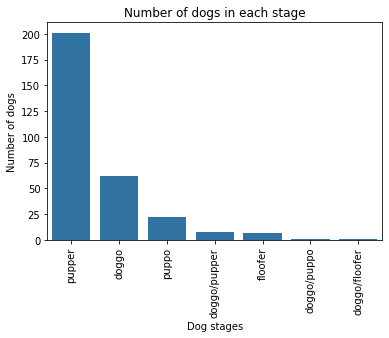

In [42]:
# bar chart showing the number of dogs in each stage
order = df_merged['dog_stages'].value_counts().index
color = sb.color_palette()[0]
sb.countplot(data = df_merged, x = 'dog_stages', order = order, color = color)
plt.xlabel('Dog stages')
plt.ylabel('Number of dogs')
plt.xticks(rotation = 90)
plt.title('Number of dogs in each stage')
plt.show()

The majority of dogs in the dataset are in the pupper stage.

### Question 3: What tweet has the highest favourite count?

In [43]:
df_merged['favorite_count'].describe()

count      1945.000000
mean       8228.497172
std       12112.002994
min          70.000000
25%        1735.000000
50%        3709.000000
75%       10248.000000
max      154154.000000
Name: favorite_count, dtype: float64

In [44]:
df_merged[df_merged['favorite_count'] == 154154]

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stages,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating_numerator_new,rating_denominator_new,rating_ratio
756,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,np.nan,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,154154,76426,13.0,10,1.3


The tweet with the highest favourite count is 'Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4'.